In [75]:
import folium
import pandas as pd

#import bite data csv file.




# create folium map for New York, add markers for 5 boroughs, customize marker.


# create markers for each borough
locations = [[40.776676, -73.971321, 'Manhatten', 'marker2.png'], 
             [40.650002, -73.949997, 'Brooklyn', 'marker2.png'], 
             [40.579021, -74.151535, 'Staten Island', 'marker2.png'], 
             [40.837048, -73.865433, 'Bronx', 'marker2.png'], 
             [40.742054, -73.769417, 'Queens', 'marker2.png']]

#import csv file
bite_data = pd.read_csv('incidents_by_year_borough.csv')

#create folium map of New York
mymap = folium.Map([40.730610, -73.935242], zoom_start=10)

#create dictionary for groups by year
year_feature_groups = {}

#create custom marker
for loc in locations:
    custom_icon = folium.CustomIcon('marker2.png', icon_size=(50, 50))
    marker = folium.Marker(location=[loc[0], loc[1]], icon=custom_icon, popup=loc[2]).add_to(mymap)

#iterate through data set for each year, creating a marker for the number of bites in each borough
for year in bite_data['year'].unique():
    data_year = bite_data[bite_data['year'] == year]

    year_feature_groups[year] = folium.FeatureGroup(name=str(year))

    for index, row in data_year.iterrows():
        lat = row['lat']
        lon = row['long']
        popup_text = f"<h3><b><u>{row['borough']}</h3></b></u><br><p>Total Bites in {row['year']}: <b>{row['incident_count']}</b></p>"

        custom_icon = folium.CustomIcon('marker2.png', icon_size=(50, 50))
        marker = folium.Marker(location=[lat, lon], icon=custom_icon, popup=popup_text).add_to(year_feature_groups[year])

    year_feature_groups[year].add_to(mymap)

#create layer control to select different years.
folium.LayerControl().add_to(mymap)


mymap.save("Folium_Map.html")


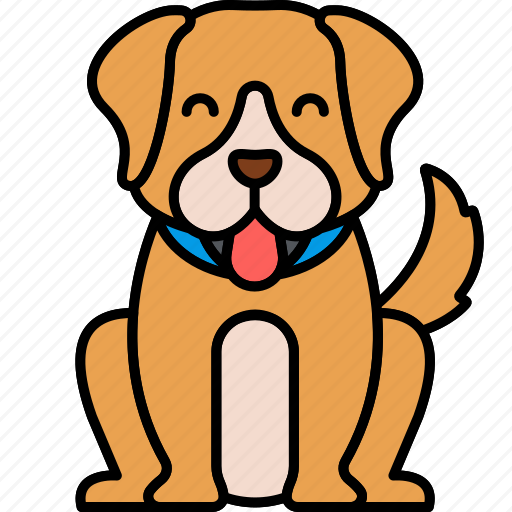
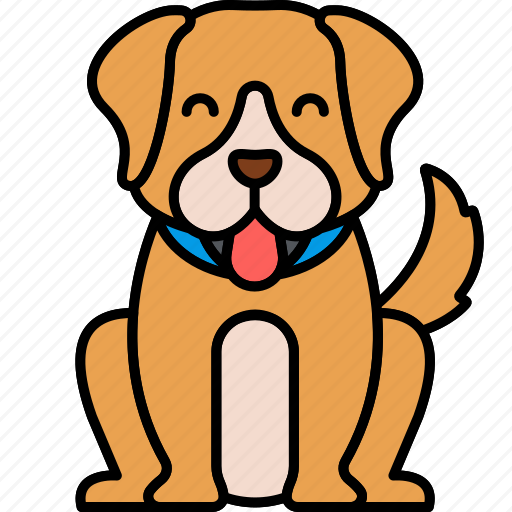
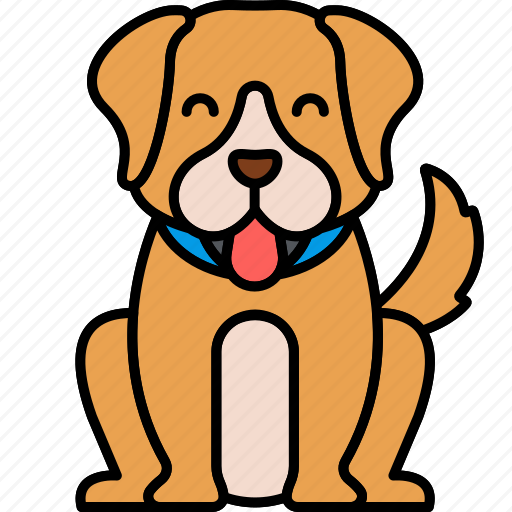
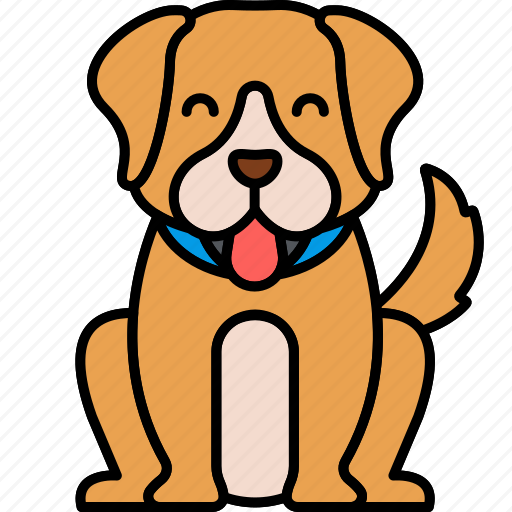
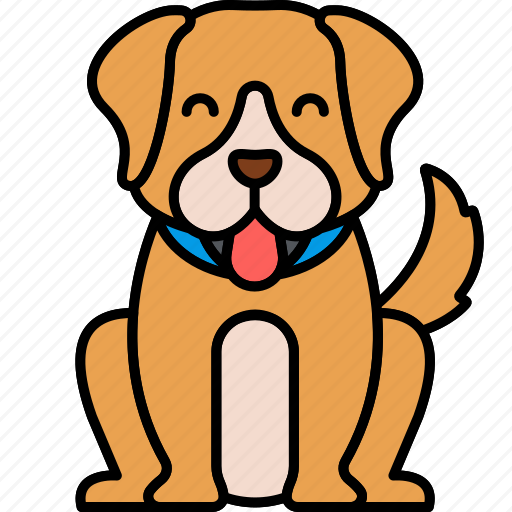
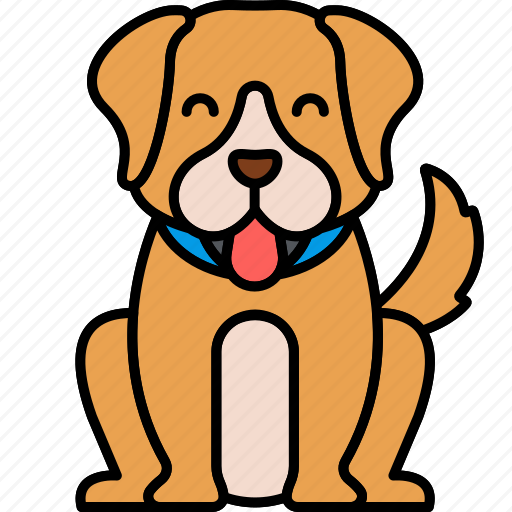
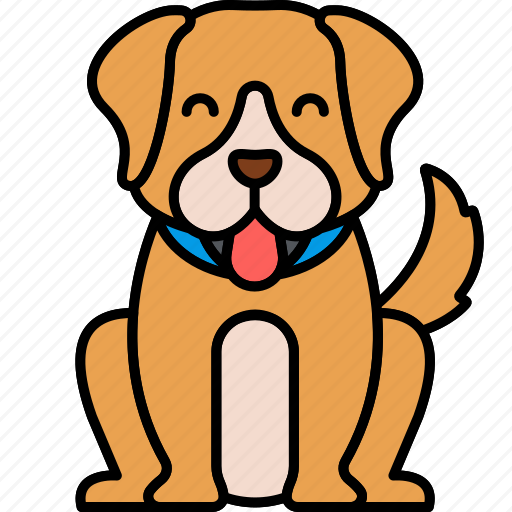
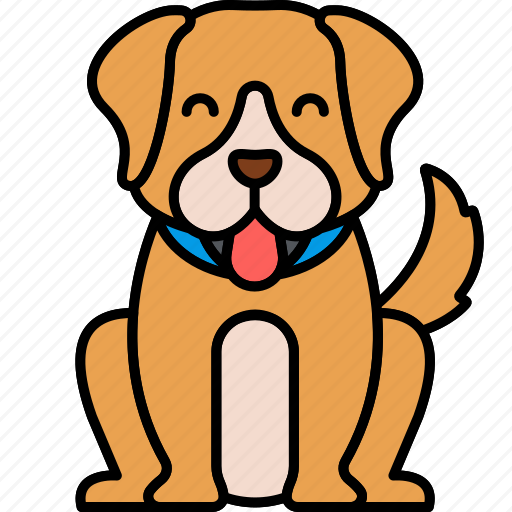
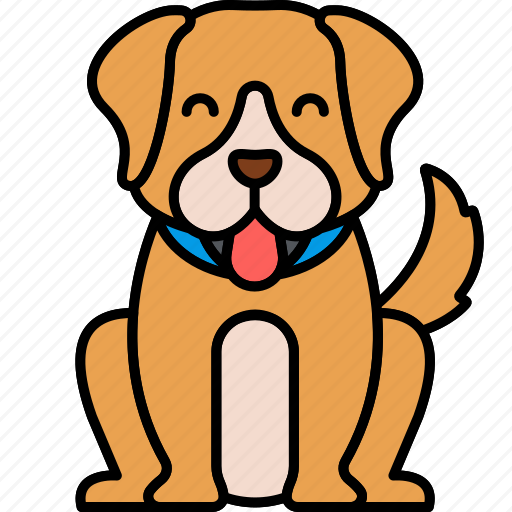
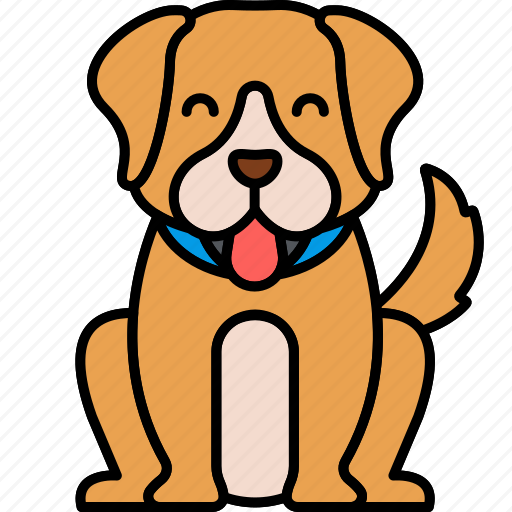
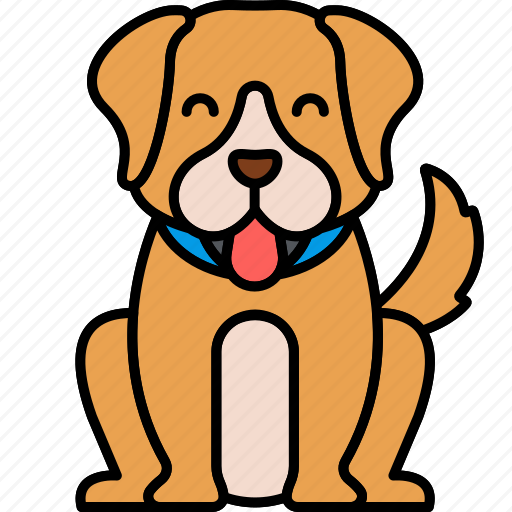
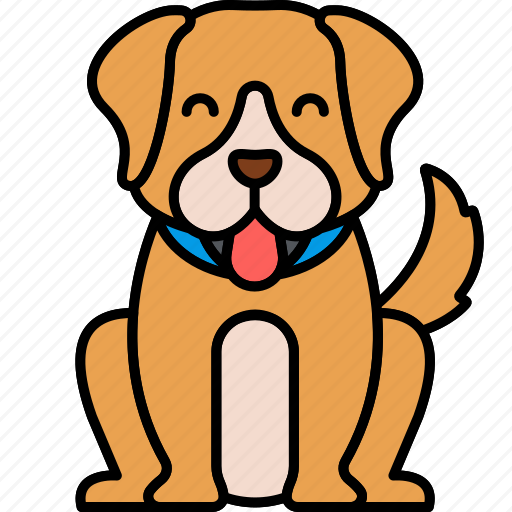
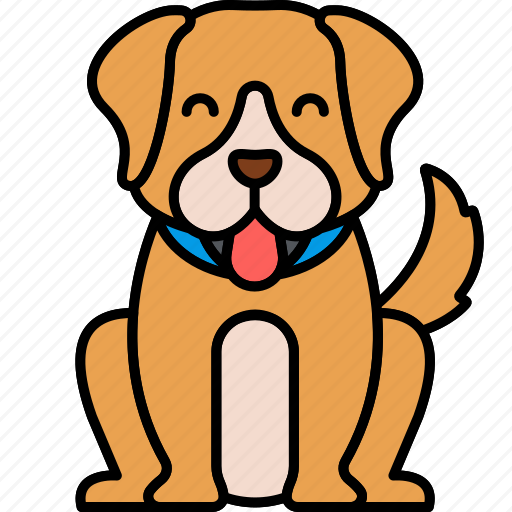
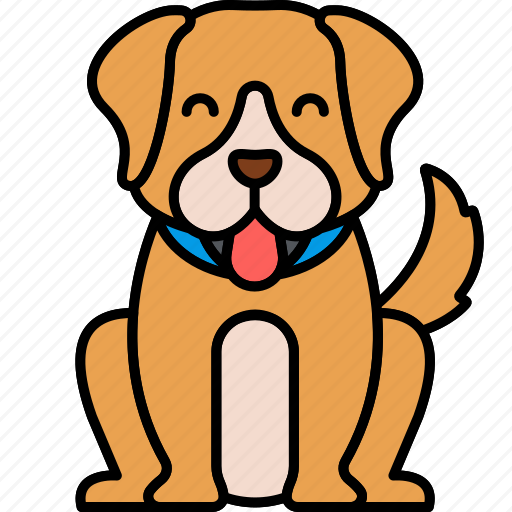
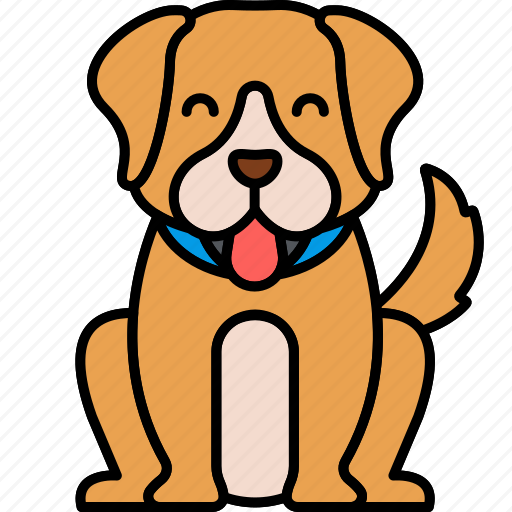
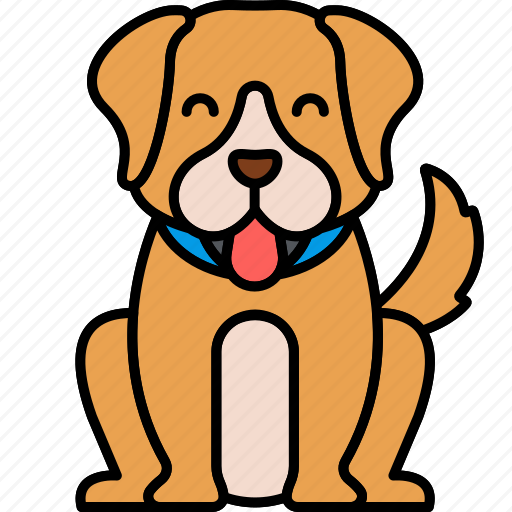
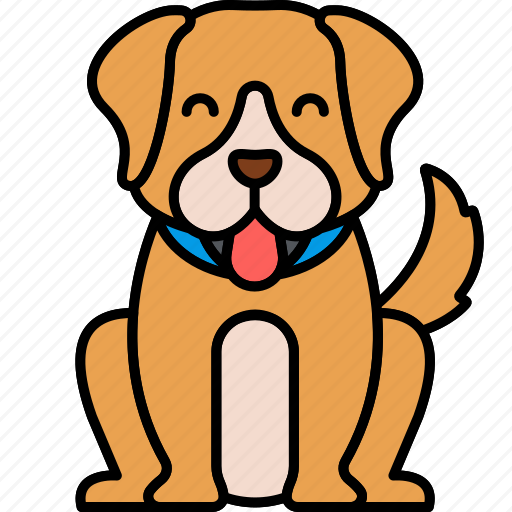
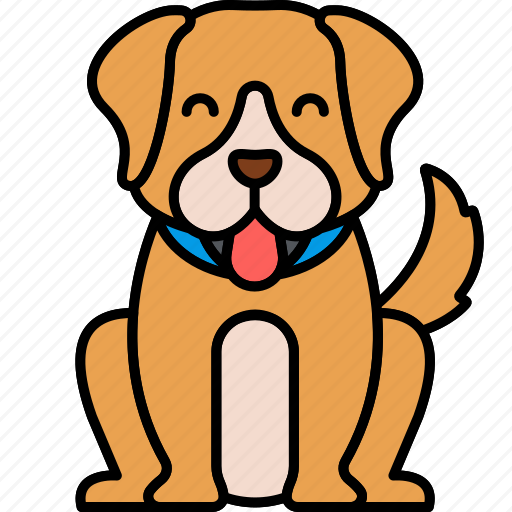
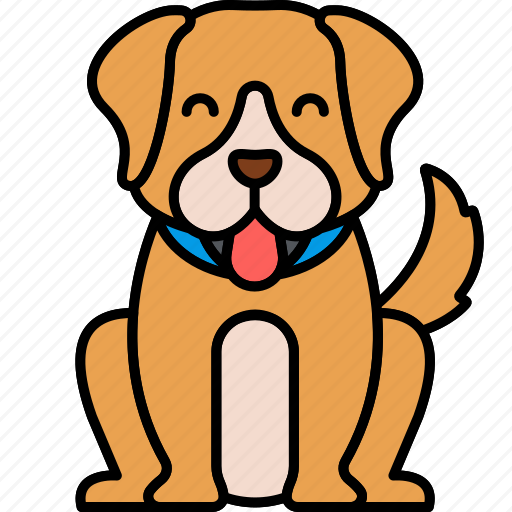
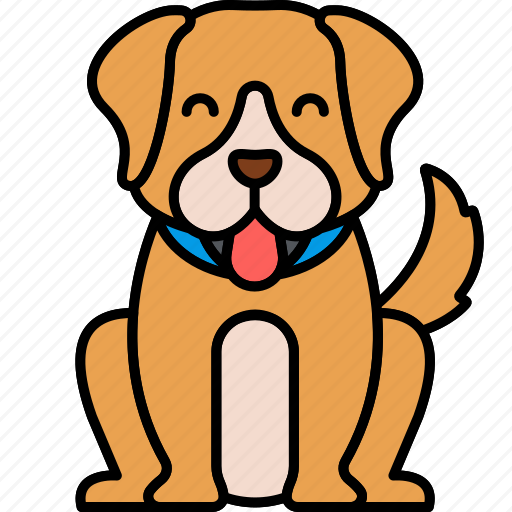
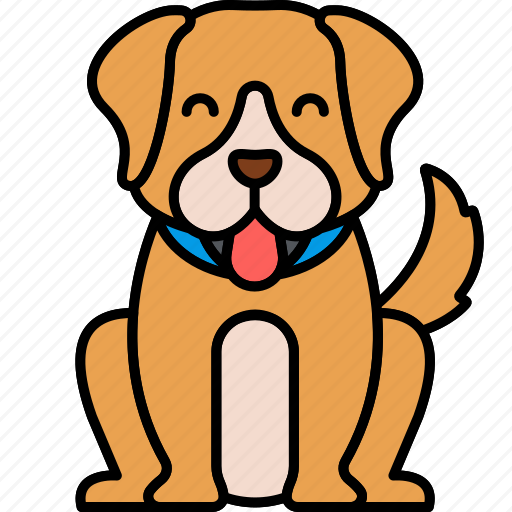
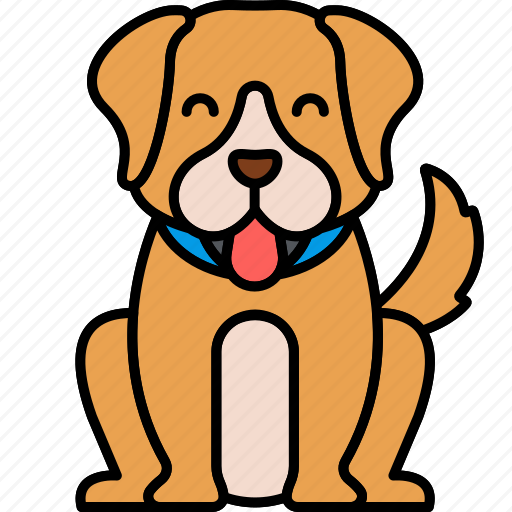
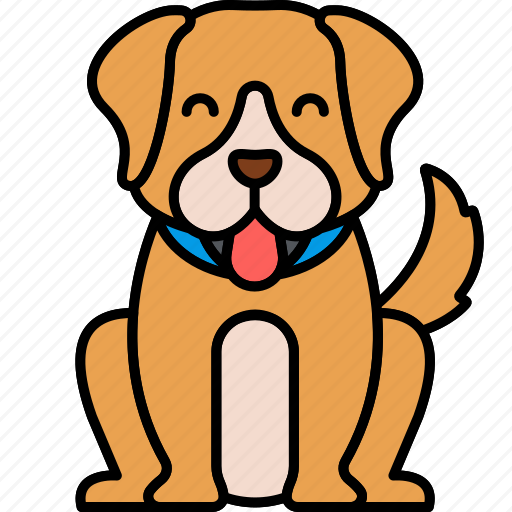
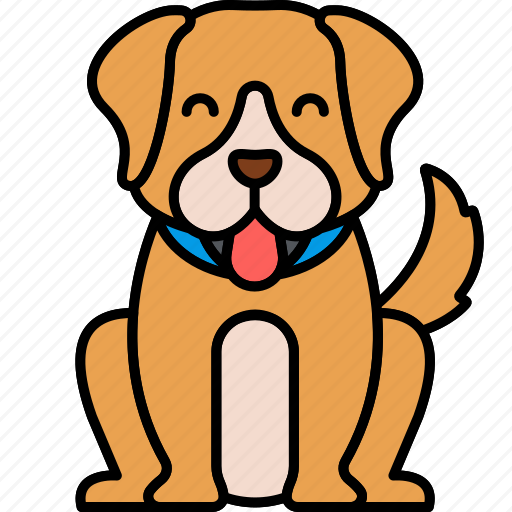
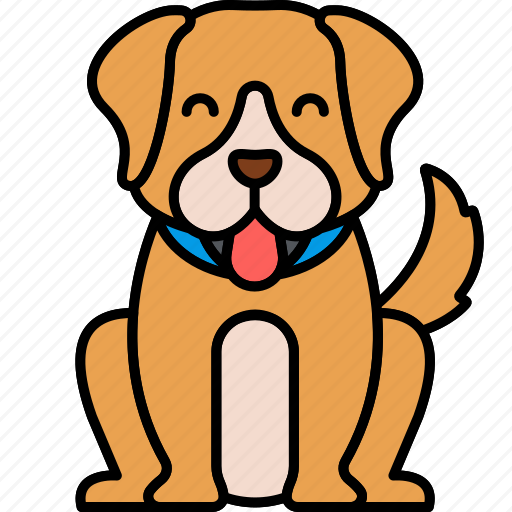
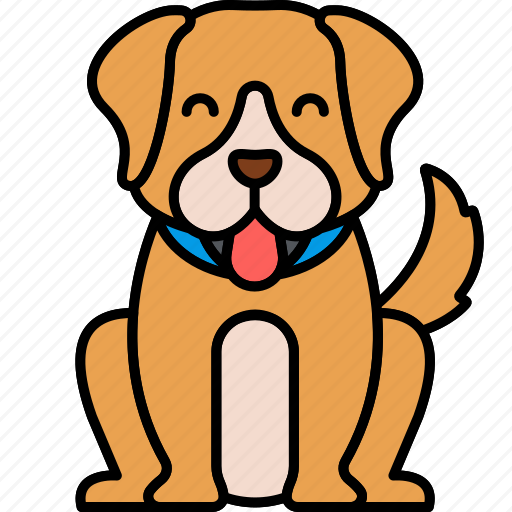
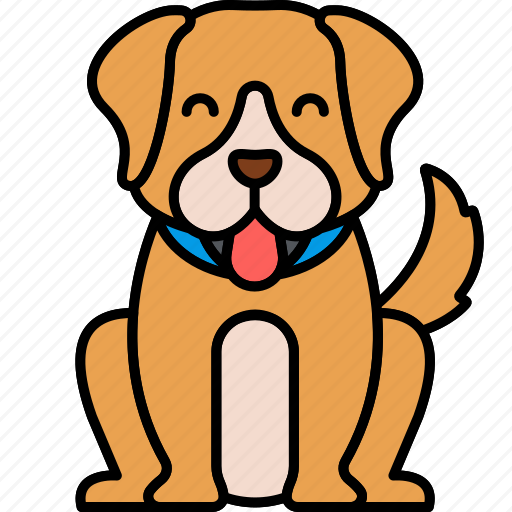
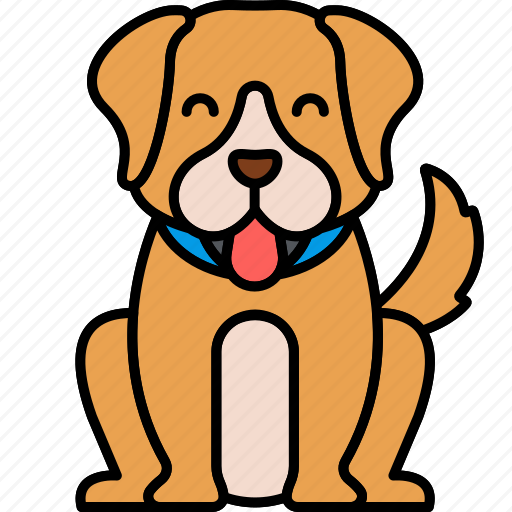
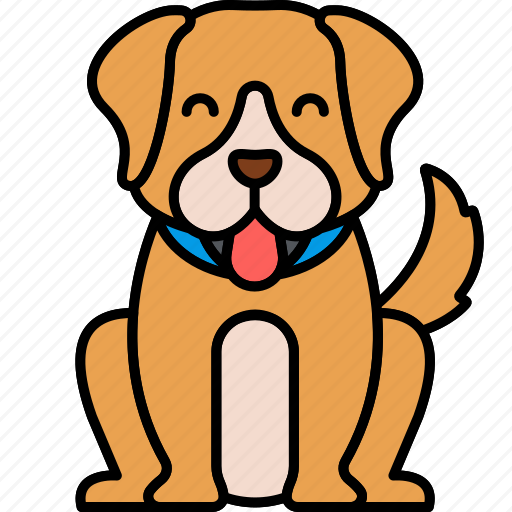
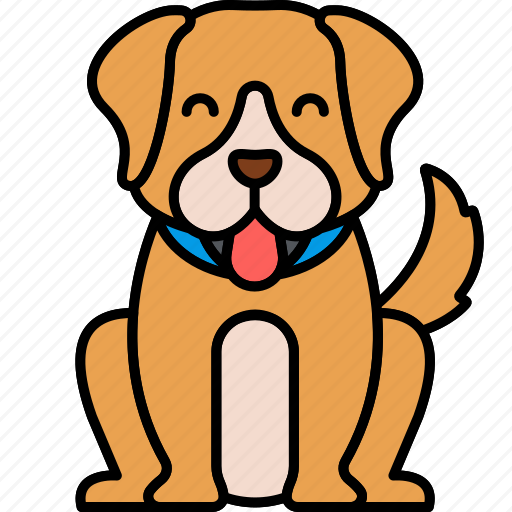
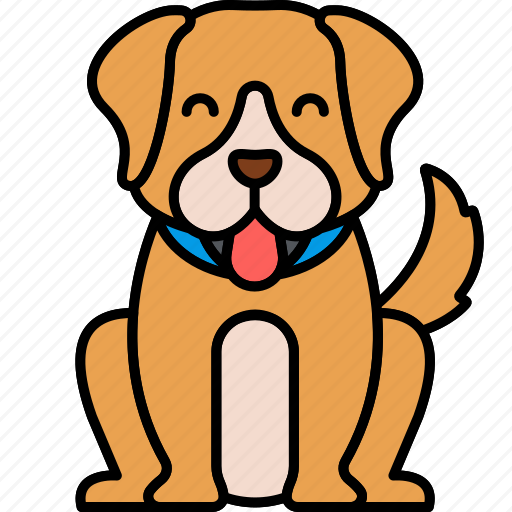
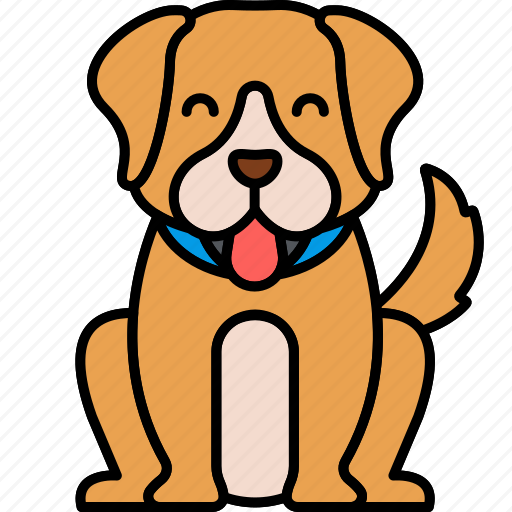
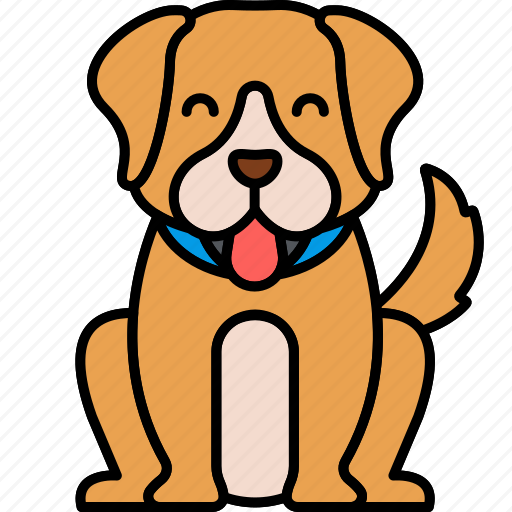
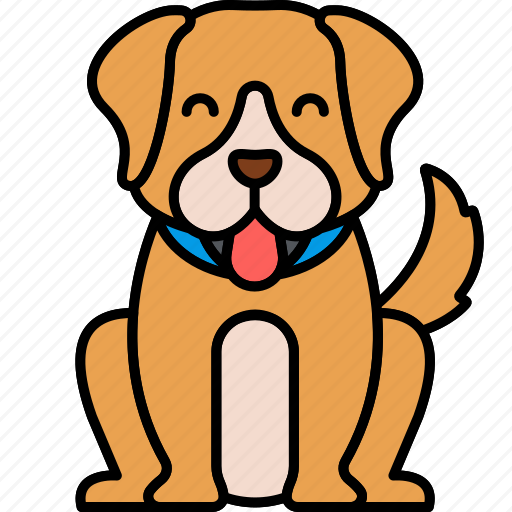
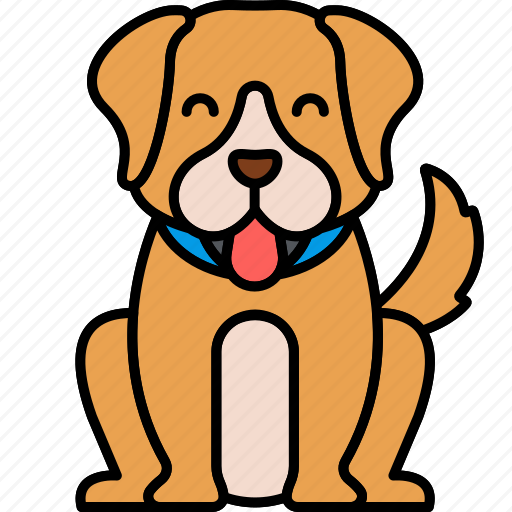
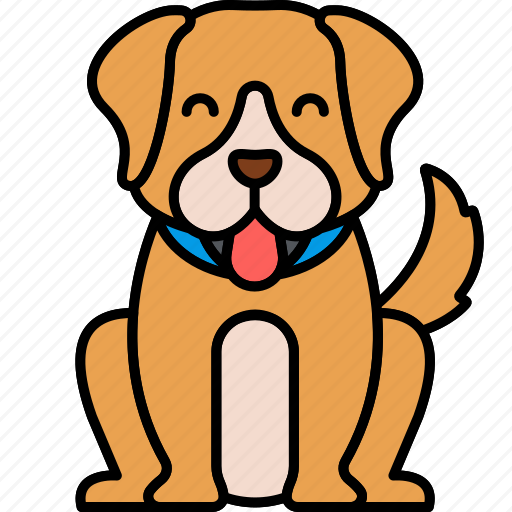
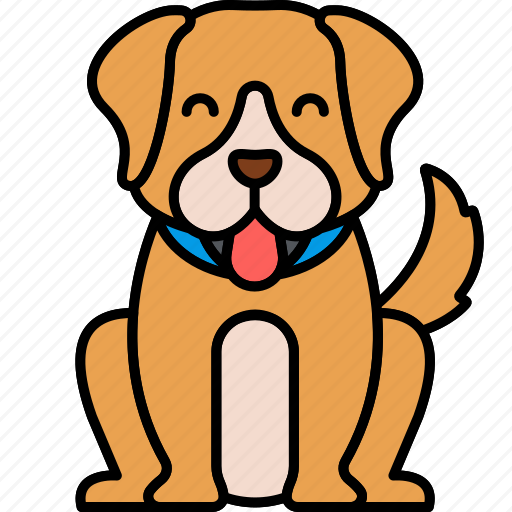
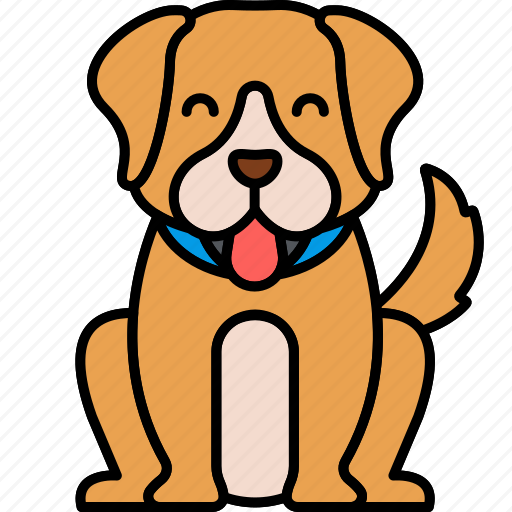
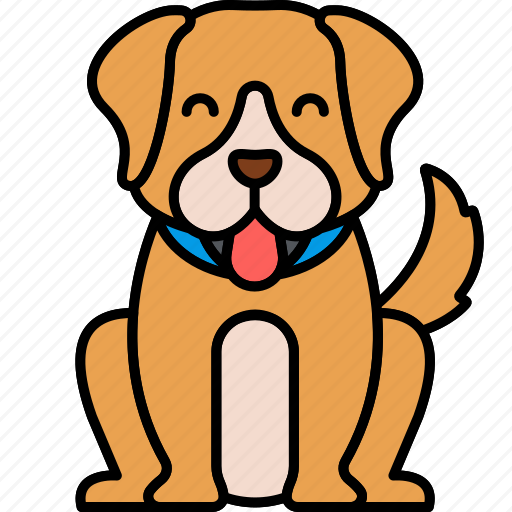
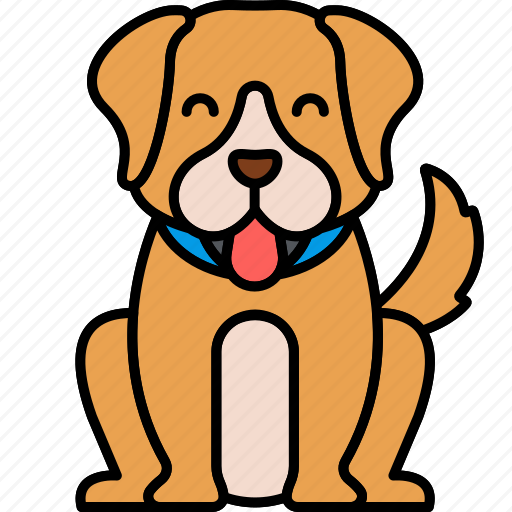
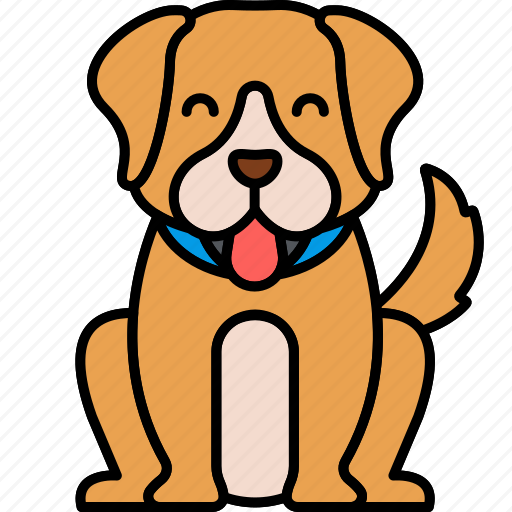
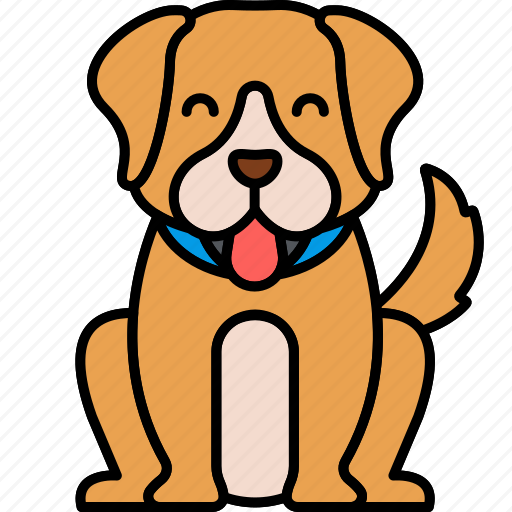
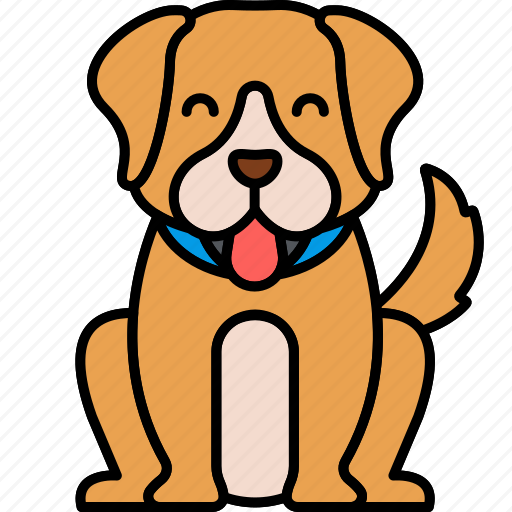
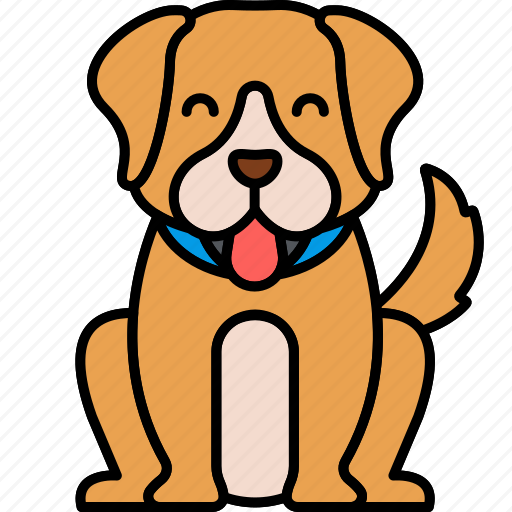
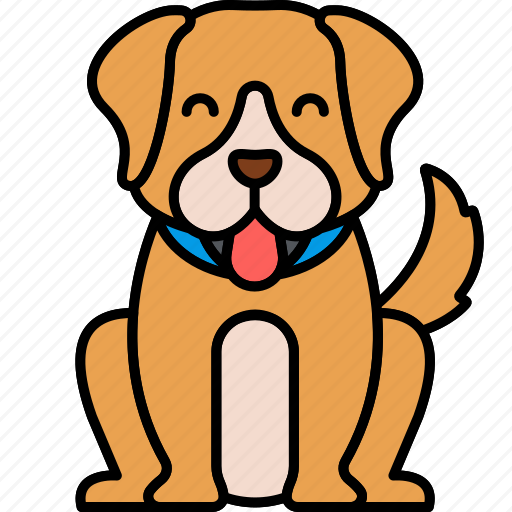

In [76]:
mymap

In [20]:
# geojson_file = 'nyc-borough.geojson'

# layer_control = folium.LayerControl().add_to(mymap)

# bite_data = pd.read_csv('incidents_by_year_borough.csv')

# from collections import defaultdict

# def add_collapsible_groups(map_obj, dataframe):    
#     all_groups = folium.FeatureGroup(name='All Years', show=False),map_obj.add_child(all_groups)
#     groups = defaultdict(lambda: FeatureGroupSubGroup(all_groups, name='', show=False))


#     for bite, row in bite_data.iterrows():
#         year = row['year']
#     if not groups[year].incident:
#         groups[year].incident = f"Year {year}", map_obj.add_child(groups[year])

#     folium.Marker(
#             location=[row['lat'], row['lon']], icon=custom_icon,
#             popup=f"Borough: {row['borough']}, Number: {row['number']}"
#         ).add_to(groups[year])
#     folium.LayerControl(collapsed=False).add_to(map_obj)

#     add_collapsible_groups(mymap, bite_data)

    
# grouped_data = bite_data.groupby(['borough', 'year'])

# for (borough, year), group in grouped_data:
#     geojson_layer = folium.GeoJson(group, name=f'{borough} - {year}')
#     geojson_layer.add_to(mymap)
    
# for year in bite_data['year'].unique():
#     folium.LayerControl(collapsed=False).add_to(mymap)

# mymap